# Graphics: Line Plots

This lesson covers:

* Basic plotting 
* Subplots 
* Histograms 
* Scatter Plots

Plotting in notebooks requires using a magic command, which starts with
`%`, to initialize the plotting backend.

In [1]:
# Setup
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(16, 6))  # Improves figure size

Begin by loading the data in hf.h5. This data set contains high-frequency
price data for IBM and MSFT on a single day stored as two Series. IBM is
stored as "IBM" in the HDF file, and MSFT is stored as "MSFT.

In [2]:
import pandas as pd

ibm = pd.read_hdf("data/hf.h5", "IBM")
msft = pd.read_hdf("data/hf.h5", "MSFT")

## Problem: Basic Plotting

1. Plot the `ibm` series which contains the price of IBM. 
2. Add a title and label the axes. 
3. Add markers and remove the line. 

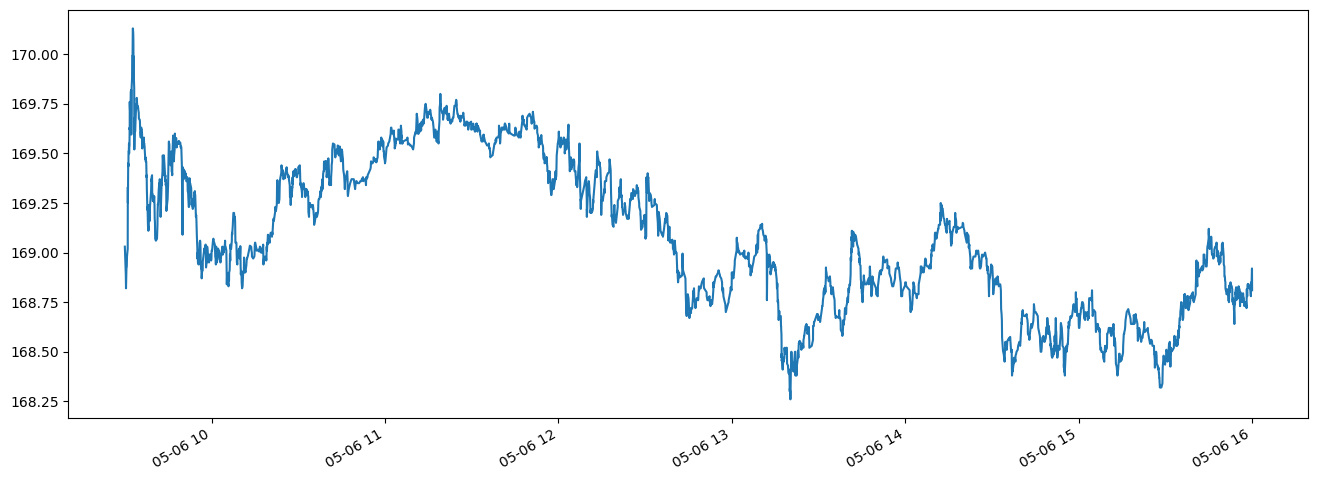

In [3]:
ax = ibm.plot()

Text(0, 0.5, 'Price')

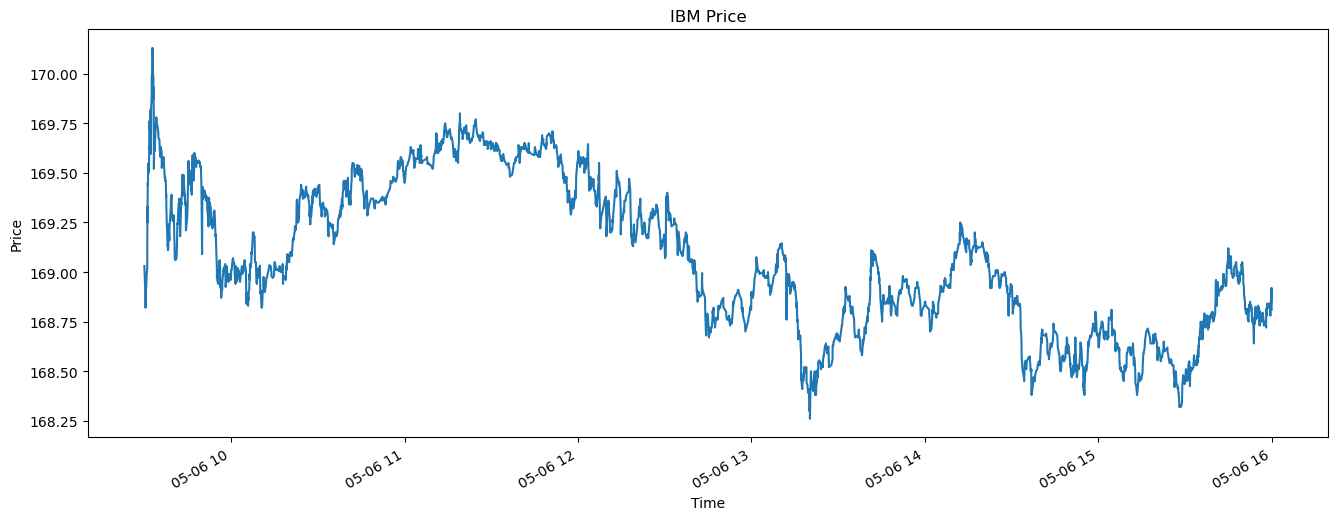

In [4]:
ax = ibm.plot()
ax.set_title("IBM Price")
ax.set_xlabel("Time")
ax.set_ylabel("Price")

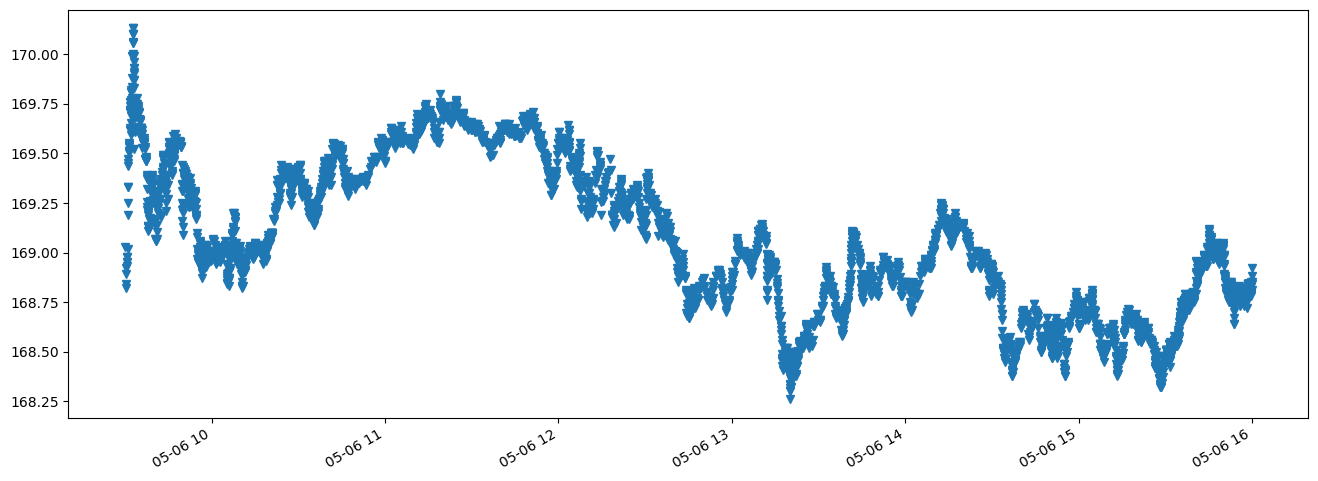

In [5]:
ax = ibm.plot(linestyle="none", marker="v")

## Problem: Subplot

Create a 2 by 1 subplot with the price of IBM in the top subplot and the
price of MSFT in the bottom subplot. 

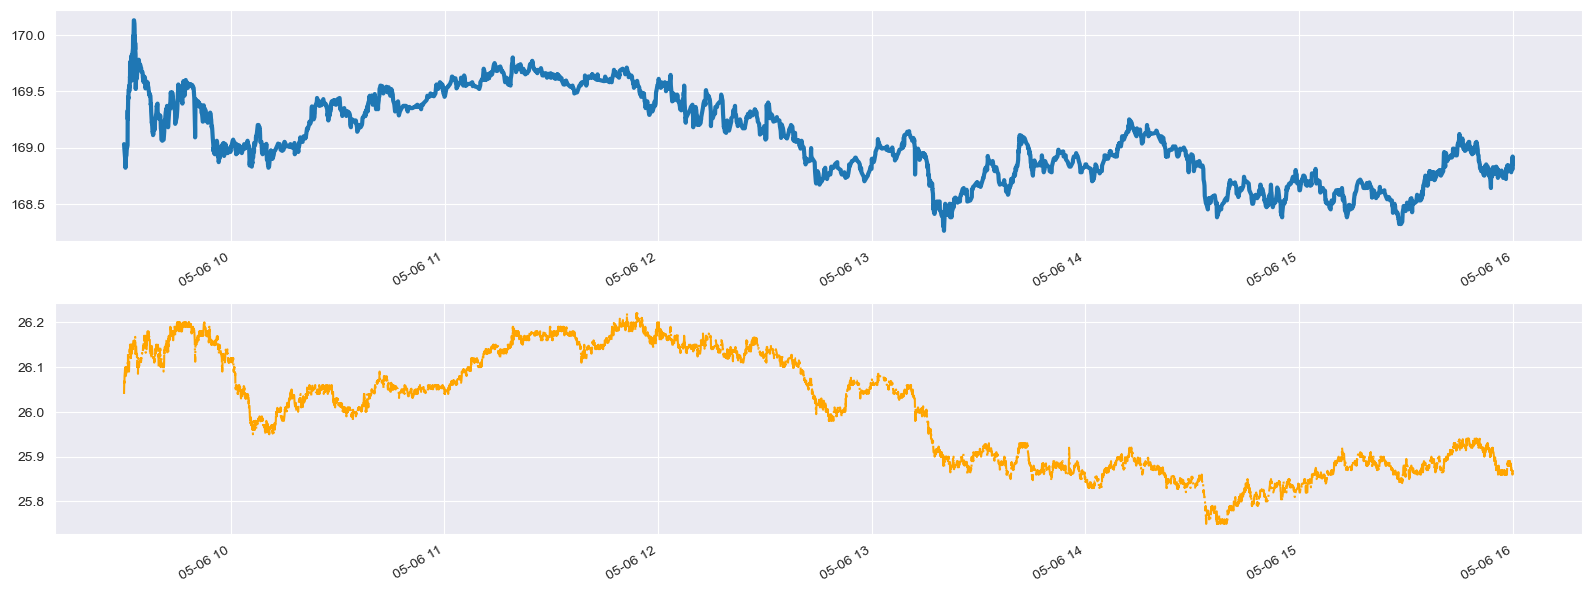

In [6]:
# Required to initialize subplots
import matplotlib.pyplot as plt

# Make plots a bit bigger
plt.rc("figure", figsize=(16, 6))
# Optional package with nice styles
import seaborn

seaborn.set_style("darkgrid")

fig, axes = plt.subplots(2, 1)
ibm.plot(ax=axes[0], linewidth=3)
msft.plot(ax=axes[1], color="orange", linestyle="-.")
# Fixes overlapping plots
fig.tight_layout(pad=1.0)

## Problem: Plot with Dates

Use `matplotlib` to directly plot `ibm` against its `index`. This is a
repeat of a previous plot but shows how to use the `plot` command directly. 

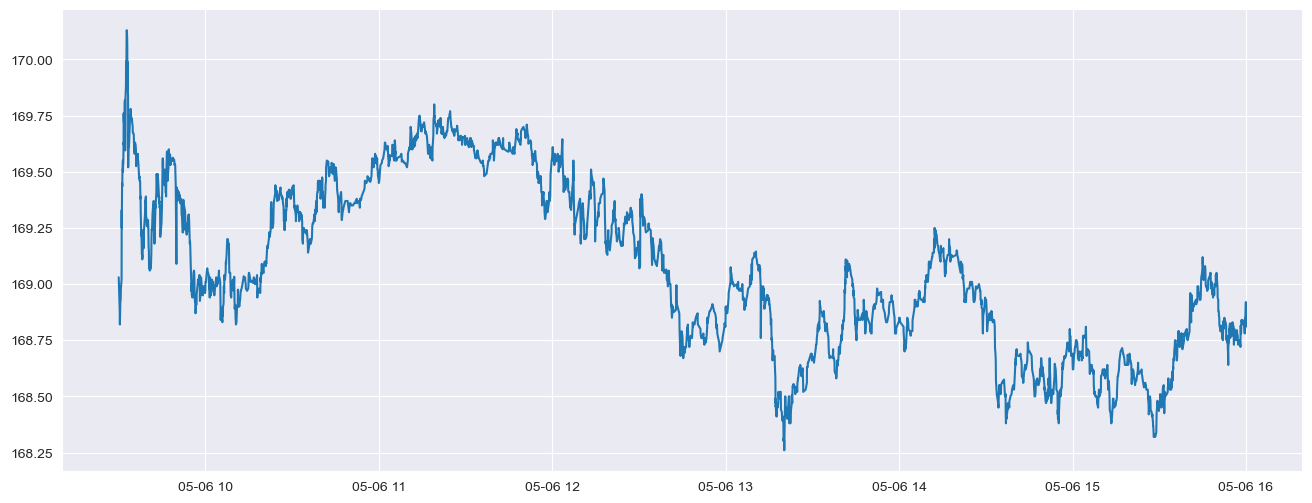

In [7]:
plt.plot(ibm.index, ibm.values)
# Set x-lim to match data, -1 selects the last element
ax.set_xlim(ibm.index[0], ibm.index[-1])
fig.tight_layout(pad=1.0)

## Exercises

### Exercise: Change seaborn

Produce a line plot of MSFT's price using seaborn's "whitegrid" style.

<Axes: >

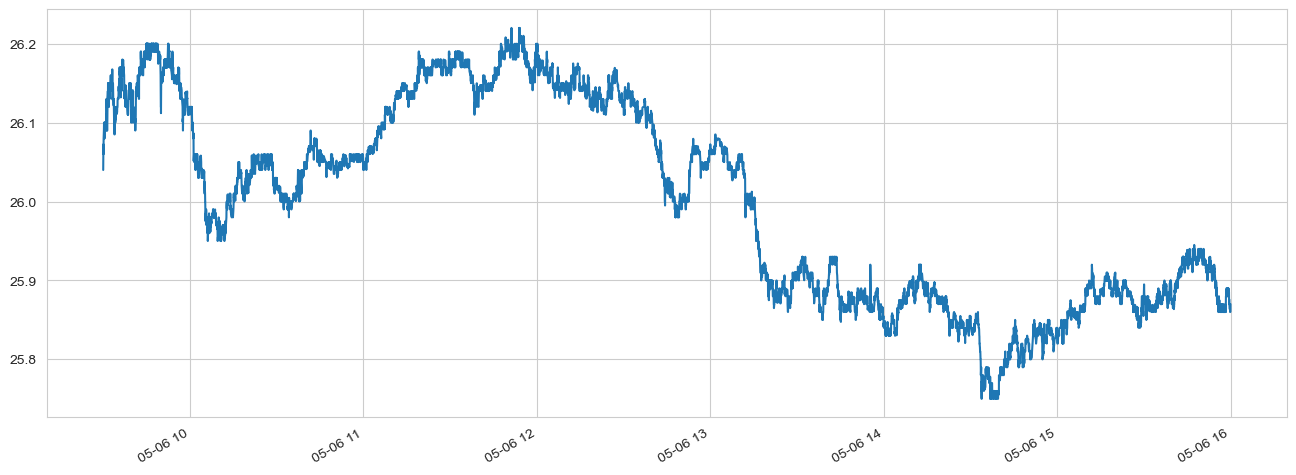

In [8]:
seaborn.set_style("whitegrid")
msft.plot()

### Exercise: HLOC plot

Use the HLOC data to produce a plot of MSFT's 5 minute HLOC
where the there are no lines, high is demarcated using a green triangle,
low is demarcated using a red downward pointing triangle, open is demarcated 
using a light grey leftward facing triangle and close is demarcated using
a right facing triangle.

**Note** Get the axes from the first, plot, and reuse this when plotting 
the other series.

In [9]:
# Setup: Load data and create values
import pandas as pd

msft = pd.read_hdf("data/hf.h5", "MSFT")
msft_5min = msft.resample("300S")
high = msft_5min.max()
low = msft_5min.min()
open = msft_5min.first()
close = msft_5min.last()

<Axes: >

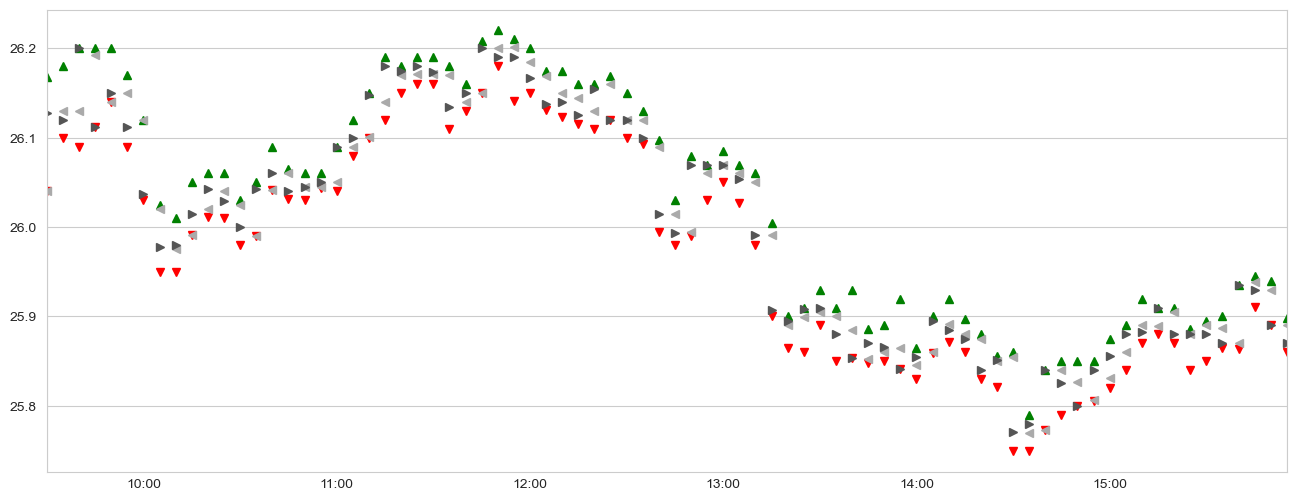

In [10]:
ax = high.plot(marker="^", color="green", linestyle="none")
low.plot(ax=ax, marker="v", color="red", linestyle="none")
open.plot(ax=ax, marker="<", color="#aaaaaa", linestyle="none")
close.plot(ax=ax, marker=">", color="#555555", linestyle="none")